### Lv3 전처리 1/4 python 파이썬 이상치 탐지

Our data is not always clean and nice.<br>

Rather, it has outliers for sure. The outlier is the data that has problems. Usually, these outliers have weird patterns compared to other normal data.<br>

Sometimes these outliers make the performance of the model low. Thus, if we are going to focus on the normal data, we need to get rid of these outliers.<br>

A representative method is IQR(Interquantile Range), which uses the deviation of quartile values. We can view this using the boxplot graph.

In [1]:
# Download the data
!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-09-10 03:59:59--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2022-09-10 03:59:59--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 172.217.161.206, 2404:6800:400a:813::200e
Connecting to drive.google.com (drive.google.com)|172.217.161.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/akglqendvvm8h9set41d9s15nfhv73sv/1662750000000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download&uuid=feb45a89-b832-444e-a938-697ed8afdcbd [following]
--2022-09-10 04:00:00--  https://doc-10-10-docs.googleuserc

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Load train.csv, test.csv as a pandas DataFrame class
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
# Check the information, shape of the data frame
print('============ train data information ============')
print(train.info(), '\n')

# Check the shape of the data frame
print('train.shape: ', train.shape, '\n')

# Check the contents of the data frame for what it is for.
print(train.head(), '\n\n')

# Check the information, shape of the data frame
print('============ test data information ============')
print(test.info(), '\n')

# Check the shape of the data frame
print('test.shape: ', test.shape, '\n')

# Check the contents of the data frame for what it is for.
print(test.head())

============ train data information ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2

<AxesSubplot:>

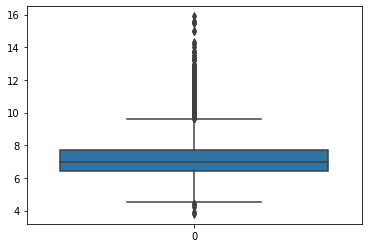

In [5]:
# Check if the data has the outliers
# We're going to use boxplot() method th see outliers in the 'fixed acidity' feature
sns.boxplot(data = train['fixed acidity'])

### Lv3 전처리 2/4 python 파이썬 이상치 제거

We're going to remove the outliers using IQR.<br>

IQR stands for Interquantile Range. It is the value between the first quartile(25%) and the third quartile(75%).<br>

For the above graph we just draw,<br>
- Solid line between 10 and 8: $3rd\;quartile + 1.5 \times IQR$<br>
- Solid upper line of blue box: $3rd\;quartile (75\%)$<br>
- Middle solid line in blue box: $quartile(median)$<br>
- Solid line below blue box: $1st\;quartile (25\%)$<br>
- Solid line between 4 and 6 : $1st\;quartile - 1.5 \times IQR$<br>
- Length of blue box: $3rd\;quartile - 1st\;quartile = IQR$<br>

We're going to judge the data points that are smaller than the solid line between 4 and 6, and larger than the solid line between 8 and 10 are the outliers, thus we will going to delete them.<br>

To do this, we're going to use `np.quantile()` method.<br>

A **quantile**(not quartile) is a point at which a given data is split into equal sizes. For example, if you take a test and want to see if you are in the top 10%, you can sort the score data and divide the number of data into 10 equal sizes, i.e. each group holds the same number of data.

In [6]:
# Get the values at 25%
quantile_25 = np.quantile(train['fixed acidity'], 0.25)

# Get the values at 75%
quantile_75 = np.quantile(train['fixed acidity'], 0.75)

In [7]:
# Put the discrepancy between the quantile_25 and the quantille_75 in variable 'IQR'.
IQR = quantile_75 - quantile_25

In [8]:
# Put the values smaller than quantile_25 in the variable 'minimum'.
minimum = quantile_25 - 1.5 * IQR

# Put the values greater than quantile_75% in the variable 'maximum'
maximum = quantile_75 + 1.5 * IQR

# Save only the values where "fixed acidity" is greater than minimum and less than maximum in "train2".
train2 = train[(minimum <= train['fixed acidity']) & (train['fixed acidity'] <= maximum)]

In [9]:
# Check the information, shape of the 'train2' data frame
print('============ train2 data information ============')
print(train2.info(), '\n')

# Check the shape of the 'train2' data frame
print('train2.shape: ', train2.shape, '\n')

# Check the contents of the 'train2' data frame for what it is for.
print(train2.head())

============ train2 data information ============
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5203 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5203 non-null   int64  
 1   quality               5203 non-null   int64  
 2   fixed acidity         5203 non-null   float64
 3   volatile acidity      5203 non-null   float64
 4   citric acid           5203 non-null   float64
 5   residual sugar        5203 non-null   float64
 6   chlorides             5203 non-null   float64
 7   free sulfur dioxide   5203 non-null   float64
 8   total sulfur dioxide  5203 non-null   float64
 9   density               5203 non-null   float64
 10  pH                    5203 non-null   float64
 11  sulphates             5203 non-null   float64
 12  alcohol               5203 non-null   float64
 13  type                  5203 non-null   object 
dtypes: float64(11), int64(

In [10]:
# Check how many outliers were removed from the original data
print(train.shape[0] - train2.shape[0])

294


<AxesSubplot:>

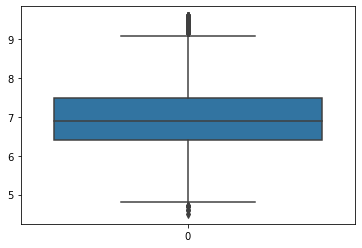

In [11]:
# Let's visualize the train2 data frame
sns.boxplot(data = train2['fixed acidity'])

### Lv3 전처리 3/4 python 파이썬 수치형 데이터 정규화

"Tree-based models" such as `decision trees` and `random forests` are not significantly affected by the unit of number because they are distinguished by comparison.<br>

However, the "smooth function models" such as `logistic regression` and `lasso` are highly affected by the size and unit of the numbers.<br>

Thus, we're going to create data that fits all models through numerical normarlization.<br>

### Min-max scaling
Min-max scaling is a simple and straightforward numerical normalization technique.<br>

It is a technique that turns the smallest value into zero, and the largest value into one. The other values in between will be distributed between zero and one according to the ratio.

In [12]:
# Import the library for min-max scalingprint('=============print('=============== train data ===============\n')== train data ===============\n')
from sklearn.preprocessing import MinMaxScaler

In [13]:
# Let's look into the train and the test data using describe() method
print('=============== train data ===============\n')
print(train.describe(), '\n\n')
print('=============== test data ===============\n')
print(test.describe())

=============== train data ===============

             index      quality  fixed acidity  volatile acidity  citric acid  \
count  5497.000000  5497.000000    5497.000000       5497.000000  5497.000000   
mean   2748.000000     5.818992       7.210115          0.338163     0.318543   
std    1586.991546     0.870311       1.287579          0.163224     0.145104   
min       0.000000     3.000000       3.800000          0.080000     0.000000   
25%    1374.000000     5.000000       6.400000          0.230000     0.250000   
50%    2748.000000     6.000000       7.000000          0.290000     0.310000   
75%    4122.000000     6.000000       7.700000          0.400000     0.390000   
max    5496.000000     9.000000      15.900000          1.580000     1.660000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     5497.000000  5497.000000          5497.000000           5497.000000   
mean         5.438075     0.055808            30.417682         

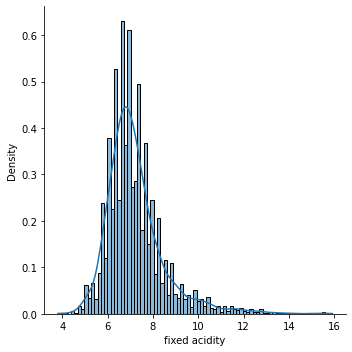

In [14]:
# Visualize the distribution plot for the feature 'fixed acidity' using displot
sns.displot(train['fixed acidity'], kde=True, stat="density", linewidth=1)

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

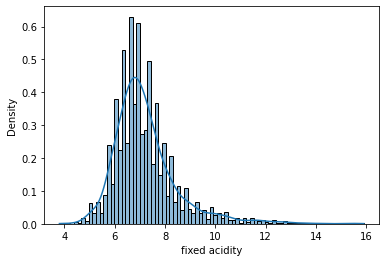

In [15]:
# Note: histplot is similar to the displot. see below
sns.histplot(train['fixed acidity'], kde=True, stat="density", linewidth=1)

In [16]:
# Set the min-max scaler into the variable 'scaler'
scaler = MinMaxScaler()

In [17]:
# Train the scaler
import time

start_time = time.time()
scaler.fit(train[['fixed acidity']])  # Expected 2D array
end_time = time.time()
print('Processing time: ', end_time-start_time, 'seconds')

Processing time:  0.0015306472778320312 seconds


In [18]:
# Change the 'fixed acidity' of the train using scaler
# Save the changed data into a new column 'Scaled fixed acidity'
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])

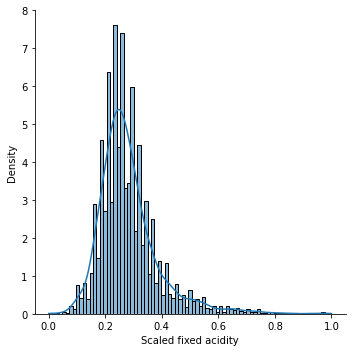

In [19]:
# Visualize the distplot of the new column
sns.displot(train['Scaled fixed acidity'], kde=True, stat="density", linewidth=1)